#### Data Set
The data set wer are going to work with is a collection of songs sourced from Spotify's Web API and can be found on Kaggle (kaggle.com/theoverman/the-spotify-hit-predictor-dataset). The data set contains a variety of features describing each song, largely in terms of its musical properties. 

Additionally, the data set contains a feature describing whether the song was a hit or not, referenced as target variable. The description of what makes a hit song can be found under the provided link. 

Throughout the analysis we are going to work with two subsets of this data. One subset contains only songs from the 1970s and the other subset contains only songs from the 2010s. Using these two subsets we are going to answer a few questions.

#### Loading packages
First, we need to import all the packages that we will need throughout the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

#### Inspeting the data
Next, we are going to load in the data and inspect it in terms of data types, missing values and any other aspetcs we may notice.

In [2]:
df2010s_raw = pd.read_csv('./dataset-of-10s.csv')
df2010s_raw.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [3]:
df1970s_raw = pd.read_csv('./dataset-of-70s.csv')
df1970s_raw.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [4]:
# Data types
print(df2010s_raw.dtypes)
print(df1970s_raw.dtypes)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object
track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus

In [5]:
# Only the first three columns in each data set appear to have the data type object, the rest is numeric.
# Since these columns are largely indiviudal text data 
# we will not treat them as categorical data that we may convert into dummy variables.
# Instead we will remve the columns
text_columns = ['track', 'artist', 'uri']
df2010s = df2010s_raw.drop(columns = text_columns)
df1970s = df1970s_raw.drop(columns = text_columns)

# Count missing values per column
print(df2010s.isnull().sum(axis = 0))
print(df1970s.isnull().sum(axis = 0))

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


In [6]:
# Great there seems to be no missing data! 
# However, in the description of the data set we find that for the key column 
# the author has used the value -1 for missing values. Let's see how many '-1's we find for the key column
print(df2010s[df2010s['key']==-1].shape[0])
print(df1970s[df1970s['key']==-1].shape[0])

0
0


In [7]:
# Awesome! We also find no '-1's. So the data set seems to be complete and with numeric values only now. 

# Also, most of the numeric values are already normalised in the provided data set. 
# Hence, I will not conduct any further normalisation.

# Before we continue let's look at some summary statistics for the 2 data sets we continue to work with.
df2010s.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [8]:
df1970s.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7.766000e+03,7766.000000,7766.000000,7766.000000,7766.000000
mean,0.525500,0.527952,5.208344,-11.734270,0.721993,0.062053,0.434240,0.162163,0.199794,0.595993,119.009447,2.399331e+05,3.883981,39.847828,10.761010,0.500000
std,0.162817,0.235493,3.504480,4.815999,0.448046,0.069837,0.321500,0.306039,0.180526,0.266211,28.381402,1.449736e+05,0.431900,18.287632,5.642133,0.500032
min,0.063000,0.001100,0.000000,-41.440000,0.000000,0.022500,0.000001,0.000000,0.014600,0.000000,35.732000,2.049300e+04,1.000000,0.000000,0.000000,0.000000
25%,0.415000,0.354000,2.000000,-14.070000,0.000000,0.033500,0.124000,0.000004,0.092400,0.397000,98.348500,1.732200e+05,4.000000,27.742090,8.000000,0.000000
50%,0.534500,0.533000,5.000000,-11.046000,1.000000,0.041600,0.409000,0.000599,0.127000,0.638000,117.397500,2.108135e+05,4.000000,35.879100,10.000000,0.500000
75%,0.646000,0.712000,9.000000,-8.400000,1.000000,0.060475,0.726000,0.100000,0.243000,0.824000,135.085000,2.649732e+05,4.000000,47.213043,12.000000,1.000000
max,0.961000,0.999000,11.000000,3.744000,1.000000,0.952000,0.996000,0.998000,0.999000,0.990000,241.423000,3.391040e+06,5.000000,220.024500,130.000000,1.000000


Generally, all the data looks as expected and we find nothing that should worry us at this point. Both data sets seem to have a similar amount of songs: 6,398 songs from the 2010s and 7,766 songs from the 1970s. Also noticably, in both data sets exactly half od the songs are hits as we find the mean of the target variable to be 0.5. 

Besides that, we find some more interesting insights when considering the means of both sets. For example, songs in the 2010s seem to have much more energy and speech on average. On the other side, songs from the 1970s score higher in terms of acoustic elements and seem to be more happy on average, as denoted by valence. Anyway, let's continue with answering some questions!

### Question 1: Were hit songs in the 2010s more predictable than back in the 1970s? 
To answer the first question I am going to build a few simple classification models in order to predict hit songs from the 1970s and 2010s. Specifically, I am using (a) a logistic regression, (b) a random forest and (c) a support vector machine to predict these. By comparing the prediction results for both decades we will be able to tell whether popular songs in the 2010s were more predictable than back in the 1970s.

In [9]:
# First we split the data sets into target and predictor variables
Y_1970 = df1970s['target']
X_1970 = df1970s.drop('target', axis=1)

Y_2010 = df2010s['target']
X_2010 = df2010s.drop('target', axis=1)

# Next we split the data into train and test sets
X1970_train, X1970_test, Y1970_train, Y1970_test = train_test_split(X_1970, Y_1970, test_size = .30, random_state=42)
X2010_train, X2010_test, Y2010_train, Y2010_test = train_test_split(X_2010, Y_2010, test_size = .30, random_state=42)

In [10]:
## LOGISTIC REGRESSION

# Now we instantiate the odel
logreg_clf = LogisticRegression(random_state=0)

# Fitting the models
mdl1_1970 = logreg_clf.fit(X1970_train, Y1970_train)
mdl1_2010 = logreg_clf.fit(X2010_train, Y2010_train)

# Prediction 
mdl1_1970.predict(X1970_test)
mdl1_2010.predict(X2010_test)

# Prediction accuracy
pred_accuracy1970_logreg = round(mdl1_1970.score(X1970_test,Y1970_test), 4)
pred_accuracy2010_logreg = round(mdl1_2010.score(X2010_test,Y2010_test), 4)

In [12]:
## RANDOM FOREST

# Instantiate the model
ranfor_clf = RandomForestClassifier(random_state=0)

# Fitting the model
mdl2_1970 = ranfor_clf.fit(X1970_train, Y1970_train)
mdl2_2010 = ranfor_clf.fit(X2010_train, Y2010_train)

# Prediction 
mdl2_1970.predict(X1970_test)
mdl2_2010.predict(X2010_test)

# Prediction accuracy
pred_accuracy1970_ranfor = round(mdl2_1970.score(X1970_test,Y1970_test), 4)
pred_accuracy2010_ranfor = round(mdl2_2010.score(X2010_test,Y2010_test), 4)

In [13]:
## SUPPORT VECTOR MACHINE

# Instantiate the model
svm_clf = svm.SVC(random_state=0)

# Fitting the model
mdl3_1970 = svm_clf.fit(X1970_train, Y1970_train)
mdl3_2010 = svm_clf.fit(X2010_train, Y2010_train)

# Prediction 
mdl3_1970.predict(X1970_test)
mdl3_2010.predict(X2010_test)

# Prediction accuracy
pred_accuracy1970_svm = round(mdl3_1970.score(X1970_test,Y1970_test), 4)
pred_accuracy2010_svm = round(mdl3_2010.score(X2010_test,Y2010_test), 4)

In [14]:
PredictionAccuracy = {'Method': ['LogReg', 'RandomForest', 'SVM'],
                     '1970s Accuracy': [pred_accuracy1970_logreg, pred_accuracy1970_ranfor, pred_accuracy1970_svm],
                     '2010s Accuracy': [pred_accuracy2010_logreg, pred_accuracy2010_ranfor, pred_accuracy2010_svm]}
PredictionAccuracy = pd.DataFrame(data=PredictionAccuracy)
PredictionAccuracy

,Method,1970s Accuracy,2010s Accuracy
0,LogReg,0.5180,0.6411
1,RandomForest,0.5730,0.8349
2,SVM,0.6215,0.6479


Interestingly, we find hit songs from the 2010s to be easier to predict across all three algorithms. Specifically, hit songs from the 2010s were most easily predicted using a Random Forest with a prediction accuracy of 83.5%. However, hits from the 1970s were most easily predicted using a Support Vector Machine with a prediction accuracy of 62.1%.  

### Question 2: What features were most likely to make a song successful in the 2010s? 
So we found out that hit songs from the 2010s are clearly more predictable than hits from the 1970s. This suggests that songs from the 2010s seem to rather have followed "recipes" on how to produce a succesful song compared to earlier songs from the 1970s. Now an interesting question arises, what made these songs succesful? What is the "recipe" to land a hit song in the 2010s? 

In order to answer this question, I am going to further look at the data from the 2010s songs. Specifically, I am going to conduct a regression analysis to determine what factors made these songs succesful.

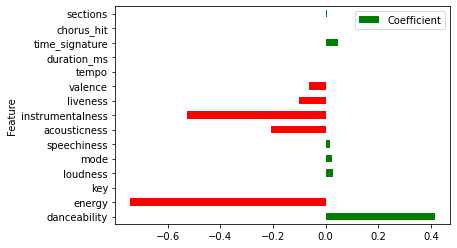

In [15]:
# Since we are not building a prediction model we want to analyse the data as a whole.

# Instantiate the model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_2010, Y_2010)

# Derive the coefficients
coeff_df = pd.DataFrame(regressor.coef_, X_2010.columns, columns=['Coefficient'])
coeff_df.reset_index(level=0, inplace=True)
coeff_df.columns = ['Feature', 'Coefficient']
coeff_df.Coefficient = coeff_df.Coefficient.round(3)

# Plot the results
coeff_df['Positive'] = coeff_df['Coefficient'] > 0
ax = coeff_df.plot(kind='barh', x='Feature', y='Coefficient', color=coeff_df.Positive.map({True:'g', False:'r'}))

In [30]:
#import statsmodels.api as sm

#X2 = sm.add_constant(X_2010)
#est = sm.OLS(Y_2010, X2)
#est2 = est.fit()
#print(est2.summary())

The results show that hit songs from the 2010s have a strong relationship with energy and danceability. Interestingly, the relationship with  energy is strongly negative while the relationship with danceability is quite positive. This suggests that hit songs in this decade were relatively danceable on the one hand, yet pretty calm on the other hand. 

This seems counterintuitive at first. However, if we look again at the defintions of the features we notice that energy is defined as fast, loud and noisy. A contrary example would be death metal, which scores high on energy but low on danceability according to the definitions. 

The results also suggest a relatively negative relationship with instrumentalness as well as a slighty negative relationship with acousticness. This would mean that hit songs contain with relatively much vocal content.

Therefore, in order to land a hit song in the 2010s, producing a rather calm, electronic dance song with a relatively large propotion of vocal content seems to have the highest chance based on these results. 

### Question 3: What genres were popular in the 2010s? 
Now we now roughly what features are needed to land a hit song in the 2010s. However, we need to keep in mind that those identified features are based on an average. Surely, not all hits in the 2010s were calm, electronic dance songs. So I would like to know what type of genres were actually popular in the 2010s. 

I will find this out by using a unsupervised learning method to cluster all the songs from the 2010s. Then I will then check what proportion of songs in each cluster were actually hits. Specifically, I am going to use a simple k-means algorithm algorithm. The k-means algorithm essentially tries to partition the data in such a way that the total distance across each observation and the centre of its corresponding cluster is minimised. This will hopefully help us to get an even better uderstanding of how to produce a hit song in the 2010s. 

First, we need to define how many clusters we are going to identify. We will do so by using the elbow method. The elbow method essentially runs the k-means algorithm for a range of clusters and for each number of clusters computes the sum of squared errors. The squared error is essentially the squared distance between each observation and its corresponding cluster centre.

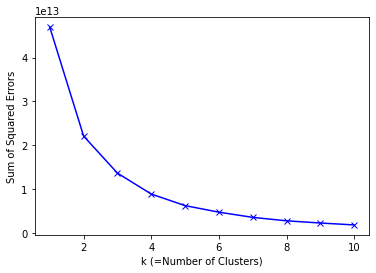

In [31]:
# How many clusters do we need?
inertia = []
K = range(1,11)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_2010)
    kmeanModel.fit(X_2010)
    inertia.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k (=Number of Clusters)')
plt.ylabel('Sum of Squared Errors')
plt.show()

The plot shows that the sum of squared errors goes down as expeced with more clusters. However, after 5 clusters we see that that there is hardly any gain in reduction of the sum of squared errors. Hence, we are going to apply k-means on the data with 5 clusters.

In [56]:
# Instantiate and fit the model
clusters = 5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(X_2010)

# Label songs according with cluster
labels = pd.DataFrame(kmeans.labels_)
labeled_2010s = pd.concat((df2010s_raw, labels),axis=1)
labeled_2010s = labeled_2010s.rename({0:'cluster'},axis=1)
labeled_2010s[labeled_2010s.cluster == 1].head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,cluster
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,1
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0,0.1080,0.274,172.065,205463,4,44.89147,9,1,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0,0.2040,0.291,91.837,193043,4,29.52521,7,0,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0,0.4090,0.737,165.084,214320,4,32.17301,12,1,1
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0,0.1080,0.369,97.547,200387,4,60.21027,10,1,1


In [37]:
# How large are the clusters?
labeled_2010s.groupby('cluster').size()

cluster
0    3382
1     352
2      58
3    1288
4    1318
dtype: int64

In [41]:
# Let's calulcate the mean values for each cluster
features_clustered = labeled_2010s.drop(columns = ['track', 'artist', 'uri'], axis=1)
features_clustered.groupby('cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
cluster,,,,,,,,,,,,,,,,
0,0.595449,0.689316,5.238025,-6.675011,0.656121,0.095526,0.186655,0.088194,0.188433,0.475213,122.996532,219015.484033,3.947073,39.874337,9.829687,0.638084
1,0.465926,0.631100,5.573864,-10.375364,0.534091,0.074982,0.243252,0.464143,0.217260,0.284312,120.091227,426616.588068,3.855114,45.083672,16.553977,0.079545
2,0.274519,0.517936,5.051724,-12.129741,0.551724,0.064767,0.368202,0.531273,0.228397,0.165374,102.649948,731949.793103,3.913793,45.453237,28.810345,0.017241
3,0.522726,0.680917,5.258540,-7.870411,0.647516,0.099555,0.187935,0.211878,0.210938,0.368659,124.157814,292172.045807,3.939441,44.074014,12.107919,0.358696
4,0.582774,0.615956,5.357360,-8.719185,0.650228,0.110527,0.309256,0.221685,0.197113,0.491154,120.413295,155374.392261,3.902124,39.735673,7.335357,0.417299


###### Cluster 0
- extremely common, making up roughly half of the included songs (53%)
- 64% are hit songs, hence quite successful
- scores highest on danceability, energy and loudness; scores lowest on acousticness and instrumentalness

###### Cluster 1
- rather niche, making up only 6% of all songs
- only 8% are hit songs, thus highly unsuccessful
- scores moderate across most features; scores relatively high on instrumentalness and low on speechiness

###### Cluster 2
- extremely niche, making up only 1% of all songs
- only 2% are hit songs, thus extremely unsucessful
- scores lowest on danceability, energy, loudness, speechiness, valence and tempo; scores highest on acousticness, instrumentalness and duration

###### Cluster 3
- relatively popular common, making up 20% of all songs
- 36% are hit songs, thus quite unsucessful
- scores moderate across most featurs; scores highest on tempo

###### Cluster 4
- relatively popular common, making up 20% of all songs
- 42% are hit songs, thus rather unsuccessful
- scores moderate across most features; scores highest on speechiness and valence and relatively high on acousticness


Question 2 suggested that succesful songs need to score high on danceability and low on energy, acousticness and instrumentalnes. This is true for the most part. The cluster with the highest share of hit songs (cluster 0) scores highest on danceability and lowest on acousticness and instrumentalness. However, it actually score highest on energy as well. This is quite surprising, but may be caused by differences within the cluster between successful and unsuccessful songs. 

Next, we are going to pick samples from each cluster to see how well they fit the description and are going to name each cluster afterwards. 

In [55]:
# picking samples that have the least squared distance to the cluster centre

X_dist = kmeans.transform(X_2010)**2 # measure squared distance for each feature to cluster center
df_distance = pd.DataFrame(X_dist.sum(axis=1), columns=['sqdist']) # sum up the distance for each song
labeled2_2010s = labeled_2010s.join(df_distance.sqdist) # join the distance to the data set
labeled_hits_2010 = labeled2_2010s[labeled2_2010s.target == 1].reset_index(drop=True)
labeled_hits_2010.loc[labeled_hits_2010.groupby('cluster').sqdist.idxmin()]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,cluster,sqdist
1730,La Modelo,Ozuna x Cardi B,spotify:track:2SbzdGpOKlH3HIAGTWTbwU,0.574,0.734,1,-2.697,1,0.0728,0.2410,...,0.0962,0.769,98.023,255507,4,95.04853,10,1,0,2.689982e+11
1062,Kelly Price,Migos Featuring Travis Scott,spotify:track:204U3zjm9kkzX25Pr4Rdld,0.745,0.685,4,-5.700,0,0.0313,0.5300,...,0.1760,0.437,121.977,363934,4,48.72336,14,1,1,2.090786e+11
2062,Not A Bad Thing,Justin Timberlake,spotify:track:3nB82yGjtbQFSU0JLAwLRH,0.308,0.563,0,-9.169,1,0.0719,0.5270,...,0.1340,0.109,85.901,688453,4,213.15499,22,1,2,7.322370e+11
928,Forever,"Drake Featuring Kanye West, Lil Wayne & Eminem",spotify:track:6HSqyfGnsHYw9MmIpa9zlZ,0.415,0.926,5,-1.304,0,0.3740,0.2530,...,0.2560,0.542,158.423,357347,4,43.43125,12,1,3,2.093646e+11
955,Thunderclouds,"Labrinth, Sia & Diplo Present... LSD",spotify:track:4lJNen4SMTIJMahALc3DcB,0.690,0.714,7,-5.948,1,0.0338,0.0077,...,0.1910,0.489,112.009,187027,4,37.19338,8,1,4,3.674150e+11


######  Cluster 0
- La Modela By Ozuna x Cardi B
- fits the description well; high on danceability and energy, much vocal content
- Dance

######  Cluster 0
- Kelly Price By Mios ft. Travis Scott
- indeed quite moderate across most features; highly instrumental and less intense on vocal content
- Trap & Other instrumental-heavy pop/hip hop genres

######  Cluster 0
- Not a bad thing By Justin Timberlake
- indeed high on acousticness, duration and low on energy and tempo; yet feels high on valence
- however, checking out some more sample, we mainly find classic and instrumental music
- Mix of instrumental/acoustic genres

######  Cluster 0
- Forever By Drake ft. Kanye West, Lil Wayne & Eminem
- mainstream rap song with some pop elements, hence indeed moderate on most featurs; indeed very high on bpm
- Hip Hop / Rap

######  Cluster 0
- Thunderclouds By Labrinth, Sia & Diplo
- Classic pop song; indeed moderate across most features and high on valence
- Pop

#### Conclusion
Overall, we find that hit songs in the 2010s were much more predictable than back in the 1970s. Specifically, hit songs in the 2010s seemed to have been high on danceability and low on acoustincness with much vocal content. That is why the most common and successful genre in the 2010s internationally seems to have been dance music. 